In [1]:
import csv
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from matplotlib import colormaps

nfl_data_to_load = Path('Resources/nfl_salary_by_pos_group.csv')

nfl_data = pd.read_csv(nfl_data_to_load)

#nfl_data.head()
cols = nfl_data.columns
#cols

[]

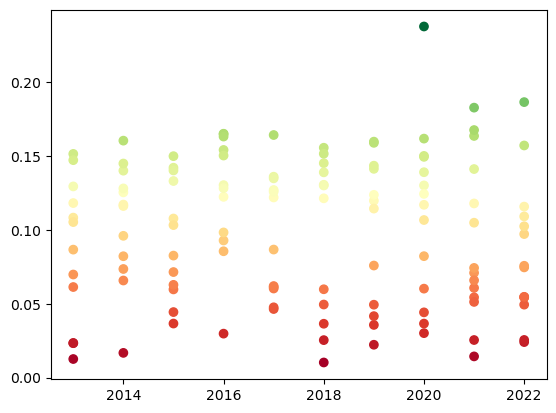

In [24]:
#x_axis = nfl_data['Season'].unique()
teams = nfl_data.loc[(nfl_data['Playoffs'] == 1, 'Season')]
x_axis = teams

winning_qb_pcts = nfl_data.loc[(nfl_data['Playoffs'] == 1, 'QB_P')]
y_axis = winning_qb_pcts

plt.scatter(x_axis, y_axis, c=y_axis, cmap='RdYlGn')
plt.plot()

[]

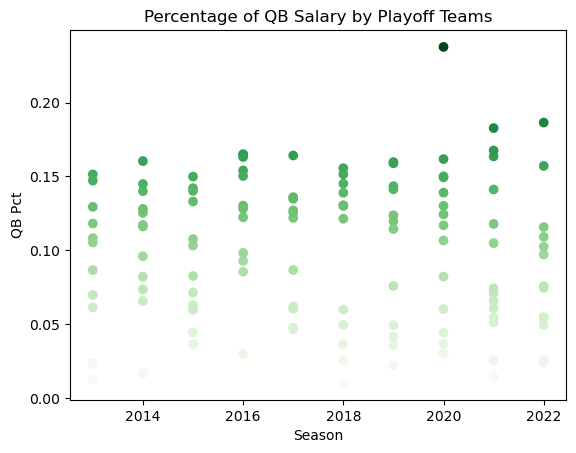

In [29]:
#x_axis = nfl_data['Season'].unique()
seasons = nfl_data.loc[(nfl_data['Playoffs'] == 1, 'Season')]
x_axis = seasons

winning_qb_pcts = nfl_data.loc[(nfl_data['Playoffs'] == 1, 'QB_P')]
y_axis = winning_qb_pcts

plt.scatter(x_axis, y_axis, c=y_axis, cmap='Greens')
plt.title('Percentage of QB Salary by Playoff Teams')
plt.xlabel('Season')
plt.ylabel('QB Pct')
plt.plot()

In [43]:
#STACKED BAR CHART
winning_qb_pcts = nfl_data[['Season', 'Team', 'QB_P']]
lessthan10_pcts = winning_qb_pcts[winning_qb_pcts.QB_P < 0.1]
lessthan10_pcts.insert(3, 'Category', 'Less Than 10%')
#lessthan10_pcts

greaterthan10_pcts = winning_qb_pcts[winning_qb_pcts.QB_P >= 0.1]
greaterthan10_pcts.insert(3, 'Category', 'Greater Than 10%')
greaterthan10_pcts
#greaterthan10_pcts

frames = [lessthan10_pcts, greaterthan10_pcts]
qb_sals_by_year = pd.concat(frames)
qb_sals_by_year

#x_axis = nfl_data['Season'].unique()
#seasons = nfl_data.loc[(nfl_data['Playoffs'] == 1, 'Season')]
#x_axis = seasons

#winning_qb_pcts = nfl_data.loc[(nfl_data['Playoffs'] == 1, 'QB_P')]
#y_axis = winning_qb_pcts

#plt.bar(x_axis, y_axis)
#plt.title('Percentage of QB Salary by Playoff Teams')
#plt.xlabel('Season')
#plt.ylabel('QB Pct')
#plt.show()

#plt.bar(x_axis, users, color='r', alpha=0.5, align='center')
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, ['Java', 'C++', 'Python', 'Ruby', 'Clojure'])
#plt.xlim(-0.75, len(x_axis)-0.25)
#plt.ylim(0, max(users)+5000)
#plt.title('Popularity of Programming Languages')
#plt.xlabel('Programming Language')
#plt.ylabel('Number of People Using Programming Languages')
#plt.show()

,Season,Team,QB_P,Category
0,2022,Cardinals,0.078525,Less Than 10%
1,2022,Falcons,0.030277,Less Than 10%
3,2022,Bills,0.097168,Less Than 10%
4,2022,Panthers,0.098279,Less Than 10%
5,2022,Bears,0.033225,Less Than 10%
...,...,...,...,...
311,2013,Rams,0.110883,Greater Than 10%
314,2013,Jets,0.119410,Greater Than 10%
315,2013,Patriots,0.118155,Greater Than 10%
316,2013,Packers,0.105283,Greater Than 10%
